# Global Terrorism Project

In this case we will consider main question: _Is our region safe?_
To solve this issue, we should check how many attacks were in each country, region and how many people were killed.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file with data, select the data we are interested in
terror=pd.read_csv('globalterrorismdb_0617dist.csv',encoding='ISO-8859-1',low_memory=False)
terror.rename(columns={'iyear':'Year','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','nkill':'Killed','nwound':'Wounded','targtype1_txt':'Target_type'},inplace=True)
terror=terror[['Year','Country','Region','AttackType','success','Killed','Wounded','Target_type']]
terror['victims']=terror['Killed']+terror['Wounded']


First of all, we will check which country have the largest amount of terrorist attacks.

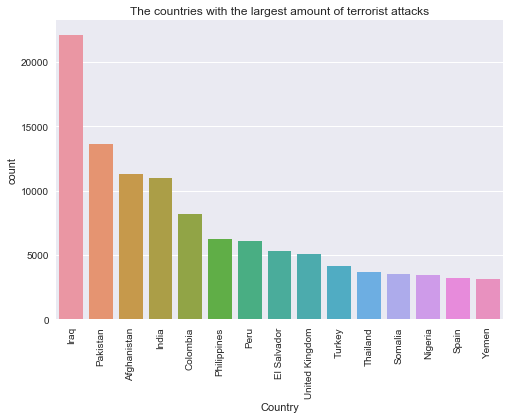

In [3]:
#filtr is used to sorting data from the smallest to the largest and to selecting the most dangerous countries
filtr = terror["Country"].value_counts().iloc[:15].index
sns.countplot('Country',data=terror[terror["Country"].isin(filtr)], order = filtr)
plt.xticks(rotation=90)
plt.title('The countries with the largest amount of terrorist attacks')
plt.show()

Next we check which region had the largest number of victims.

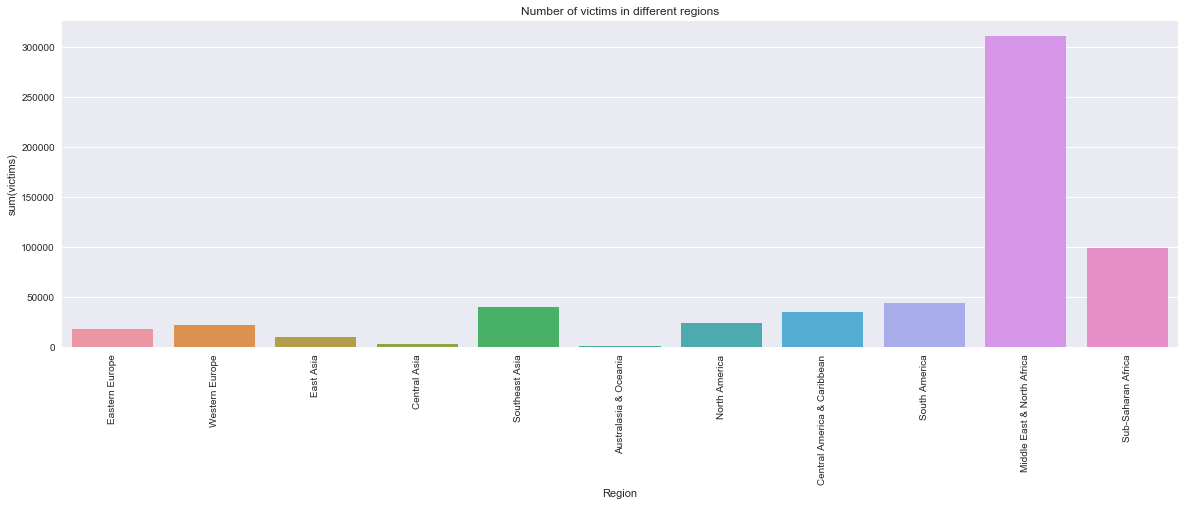

In [4]:
#How many people were killed, 
plt.subplots(figsize=(20,6))
#type_order is used to sorting the data
type_order = ['Eastern Europe', 'Western Europe','East Asia','Central Asia','Southeast Asia','Australasia & Oceania','North America', 'Central America & Caribbean', 'South America','Middle East & North Africa','Sub-Saharan Africa']
sns.barplot(x="Region",y="victims", data=terror, estimator=sum, ci=None, order=type_order)
plt.xticks(rotation=90)
plt.title('Number of victims in different regions')
plt.show()

Lets take a look on top 5 targets of terrorist attacks in different regions.

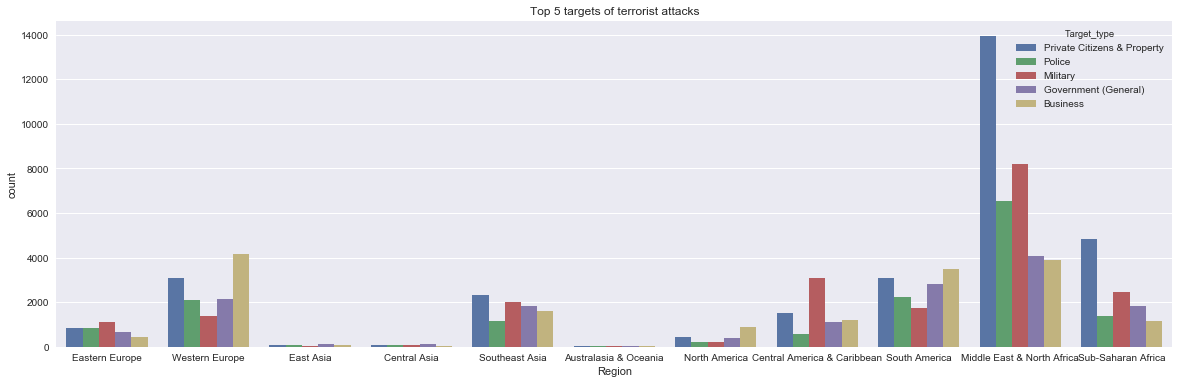

In [5]:
plt.subplots(figsize=(20,6))
filtr = terror["Target_type"].value_counts().iloc[:5].index
sns.countplot(x="Region", hue="Target_type", data=terror[terror["Target_type"].isin(filtr)], order=type_order)
plt.title('Top 5 targets of terrorist attacks')
plt.show()

Let's focus on Eastern Europe. Let's see how the number of victims has changed over the years.

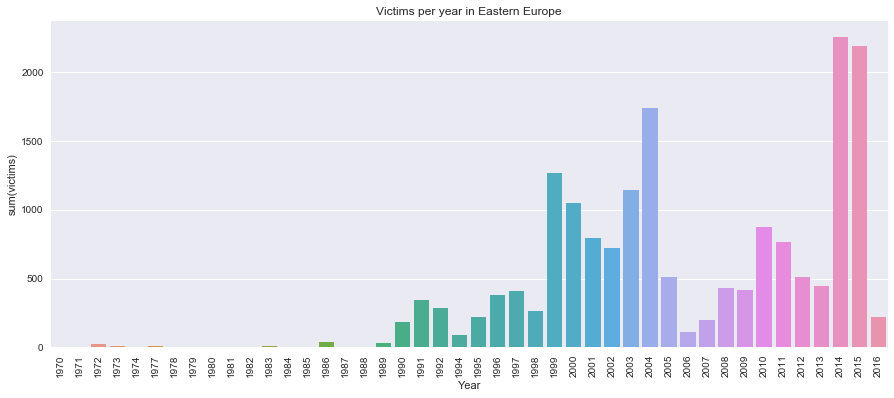

In [6]:
#plot about Eastern Europe
plt.subplots(figsize=(15,6))
sns.barplot(x="Year", y="victims", data=terror[terror["Region"]=="Eastern Europe"], estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title("Victims per year in Eastern Europe")
plt.show()

What's the most common target of terrorist in Eastern Europe? 

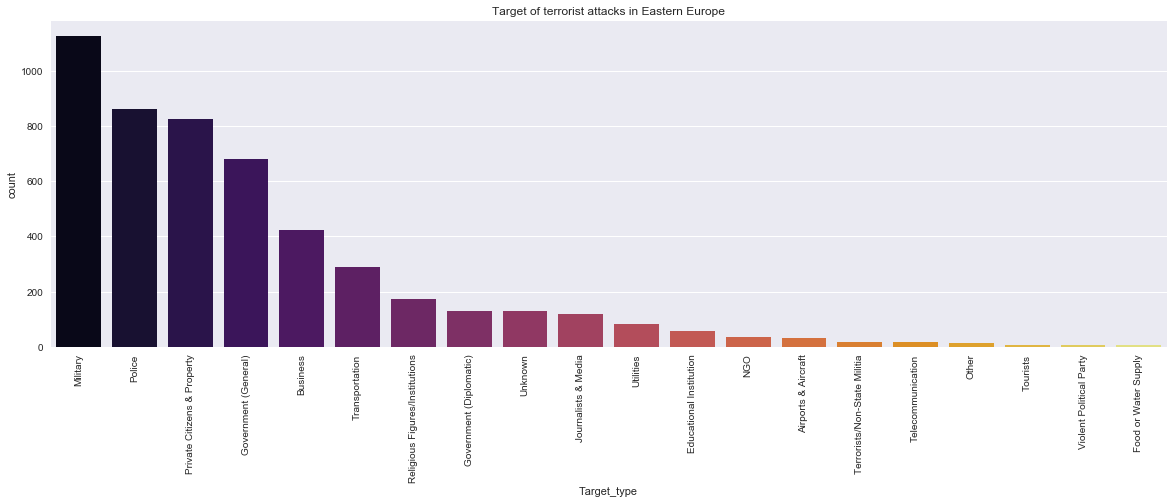

In [7]:
plt.subplots(figsize=(20,6))
o = terror["Target_type"].where(terror["Region"]=="Eastern Europe").value_counts().index
sns.countplot(x="Target_type", data=terror[terror["Region"]=="Eastern Europe"], palette='inferno', order=o)
plt.title('Target of terrorist attacks in Eastern Europe')
plt.xticks(rotation=90)
plt.show()

Finally, we compare the success rate of terrorist attacks in Eastern Europe.

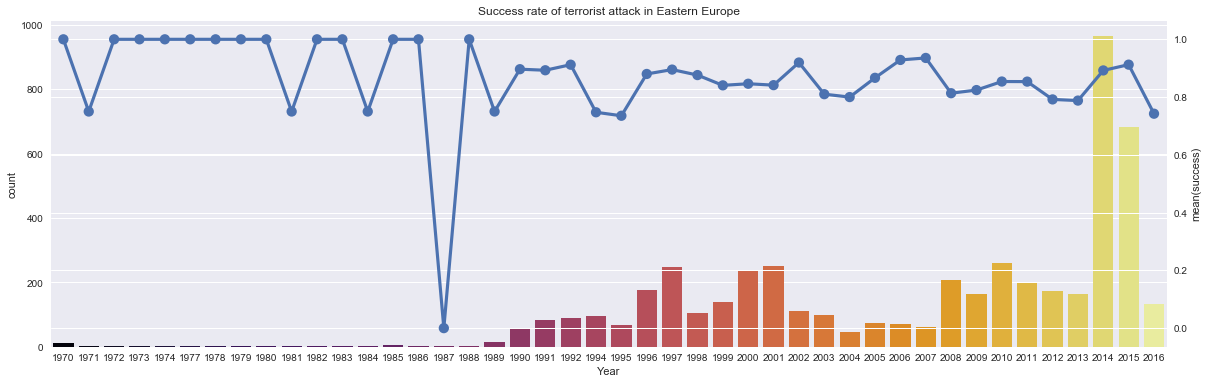

In [8]:
#ax to create two plots on one figure
fig,ax =plt.subplots(figsize=(20,6))
sns.countplot(x="Year", data=terror[terror["Region"]=="Eastern Europe"], palette='inferno',ax=ax)
ax2=ax.twinx()
sns.pointplot(x="Year",y="success", data=terror[terror["Region"]=="Eastern Europe"], ax=ax2, ci = None, edgecolor=sns.color_palette("dark", 1))
plt.title('Success rate of terrorist attack in Eastern Europe')
plt.xticks(rotation=90)
plt.show()

To summarize, if you live in Eastern Europe you are in better situation than some other regions. Why? Most of terrorist attacks aren't targeted at citizens. In Eastern Europe probability of attack is smaller than in other regions. But unfortunately, in the recent years the number of terrorist attacks has increased. Remember about it, be careful and _Carpe Diem!_